In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

CPU times: total: 0 ns
Wall time: 0 ns


# Data Analyses on Titanic Dataset

## Dataset Source and Description

Titanic dataset includes data about which passengers survived the Titanic shipwreck

Source: [https://www.kaggle.com/datasets/brendan45774/test-file?resource=download](https://www.kaggle.com/datasets/brendan45774/test-file?resource=download)

## Data Analyses Goal
We'll analyse the dataset in order to be able to answer next questions:

1. Did the sex of the passengers affect the chances of surviving?

2. Did Age effect the chances of surviving?

3. Did the Port of Embarkation affect the chances of surviving?

## Data Acquisition


In [2]:
#Load the CSV into a Pandas Dataframe
titanic_data = pd.read_csv('../JupyterDemos/datasets/tested.csv')

In [3]:
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Data Cleaning

### Get initial data insight


In [4]:
titanic_data.shape

(418, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Note, that **there are missing values at the Age, Cabin and Fare columns.**

### Sum up the total missing values

In [6]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since most of Cabin column values are missing we will omit this column along with the Ticket, PassengerId and Name columns that we will not use for this initial investigation.

We will make a new Dataframe in case we want to access the initial one again.

In [7]:
#Drop the unneeded columns
titanic_data_clean=titanic_data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [8]:
titanic_data_clean.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S


### Deal with missing

#### Deal with Age NaNs

We have 86 missing Age values, so we can not afford to delete so many rows. We must find a proper value to replace with.

Let's get some insight about Age values

In [9]:
titanic_data_clean.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

We will replace missing Age values with its median

In [10]:
age_median = titanic_data_clean['Age'].median()
titanic_data_clean['Age'] = titanic_data_clean['Age'].fillna(age_median)

#### Deal with missing values for Fare


In [11]:
titanic_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

We have only 1 missing value in Fare column, so we can just delete this 1 row

In [12]:
# drop all rows with NaNs for fare
titanic_data_clean.dropna(axis=0, inplace=True)

In [13]:
titanic_data_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Checking for outliers
Let's create boxplots for continuous data fields and checking to see which values lie outside the 'minimum' and 'maximum' ranges.

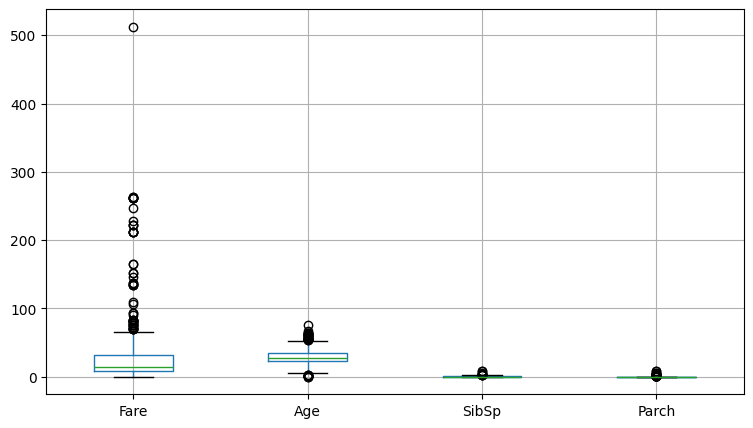

In [14]:
titanic_data_clean.boxplot(column=['Fare', 'Age', 'SibSp', 'Parch'], figsize=(9,5))
plt.show()

In the 'Fare' feature there are some outliers well in excess of 500. As this is only a small group of outliers, removing them is unlikely to change the outcome of the data analysis. Therefore, we can trim the dataset to exclude these points.

In [15]:
# get rows for which 'fare'>=500
outliears = titanic_data_clean[titanic_data_clean['Fare']>=500]
outliears

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,1,1,female,58.0,0,1,512.3292,C


In [16]:
# now, drop that rows
titanic_data_clean.drop(outliears.index, inplace=True)

In [17]:
titanic_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  416 non-null    int64  
 1   Pclass    416 non-null    int64  
 2   Sex       416 non-null    object 
 3   Age       416 non-null    float64
 4   SibSp     416 non-null    int64  
 5   Parch     416 non-null    int64  
 6   Fare      416 non-null    float64
 7   Embarked  416 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.2+ KB


We will replace the Sex values from text to numeric values to see if there is corralation between survival and sex.

Male -> 5

Female -> 6 

In [18]:
titanic_data_clean = titanic_data_clean.replace('male', 5)
titanic_data_clean = titanic_data_clean.replace('female', 6)

C:\Users\Vilia\AppData\Local\Temp\ipykernel_13404\132813191.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data_clean = titanic_data_clean.replace('female', 6)


Replacing Embarked:

Q -> 1

S -> 2

C -> 3

In [19]:
titanic_data_clean = titanic_data_clean.replace('Q', 1)
titanic_data_clean = titanic_data_clean.replace('S', 2)
titanic_data_clean = titanic_data_clean.replace('C', 3)

C:\Users\Vilia\AppData\Local\Temp\ipykernel_13404\3463022692.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data_clean = titanic_data_clean.replace('C', 3)


In [20]:
titanic_data_clean.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,5,34.5,0,0,7.8292,1
1,1,3,6,47.0,1,0,7.0000,2
2,0,2,5,62.0,0,0,9.6875,1
3,0,3,5,27.0,0,0,8.6625,2
4,1,3,6,22.0,1,1,12.2875,2
5,0,3,5,14.0,0,0,9.2250,2


In [21]:
titanic_data_clean.corr().style.background_gradient(cmap='Greens', axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.102928,1.000000,0.005426,0.100965,0.156972,0.181419,-0.042817
Pclass,-0.102928,1.000000,-0.102928,-0.472818,0.000330,0.021884,-0.603177,-0.368824
Sex,1.000000,-0.102928,1.000000,0.005426,0.100965,0.156972,0.181419,-0.042817
Age,0.005426,-0.472818,0.005426,1.000000,-0.066505,-0.045354,0.333229,0.137935
SibSp,0.100965,0.000330,0.100965,-0.066505,1.000000,0.307543,0.200243,0.042880
Parch,0.156972,0.021884,0.156972,-0.045354,0.307543,1.000000,0.239439,0.065257
Fare,0.181419,-0.603177,0.181419,0.333229,0.200243,0.239439,1.000000,0.314146
Embarked,-0.042817,-0.368824,-0.042817,0.137935,0.042880,0.065257,0.314146,1.000000
